## Import neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from math import pi


## Load the dataset

In [2]:
df = pd.read_csv("../Dataset/Smaller_Iowa_Liquor_Sales.csv")

## Inspecting the Dataset

In [3]:
# Display the first five rows of the dataset to understand its structure
df.head(5)

,Date,Store.Name,Address,City,Zip.Code,County,Category.Name,Vendor.Name,Item.Description,Pack,Bottle.Volume..ml.,State.Bottle.Cost,State.Bottle.Retail,Bottles.Sold,Volume.Sold..Liters.
0,3/22/2017,SMOKIN' JOE'S #5 TOBACCO AND LIQUOR OUTLET,1115 ALBIA RD,OTTUMWA,52501.0,WAPELLO,BLENDED WHISKIES,JIM BEAM BRANDS,BEAM'S 8 STAR BL WHISKEY,24,375,2.09,3.14,24,9.00
1,3/21/2017,CENTRAL CITY 2,1501 MICHIGAN AVE,DES MOINES,50314.0,POLK,IMPORTED BRANDIES,VIN DIVINO LTD,PRESIDENTE GRAPE BRANDY (PEDRO DOMECQ),12,750,8.49,12.74,12,9.00
2,3/22/2017,HY-VEE WINE AND SPIRITS / HUMBOLDT,1011 13TH ST NORTH,HUMBOLDT,50548.0,HUMBOLDT,SINGLE MALT SCOTCH,JIM BEAM BRANDS,LAPHROAIG 10 YR SINGLE MALT SCOTCH,12,750,23.62,35.43,3,2.25
3,3/23/2017,SUPER TARGET T-0804 MASON CITY,3450 4TH ST SW,MASON CITY,50401.0,CERRO GORD,SPICED RUM,DIAGEO AMERICAS,CAPTAIN MORGAN SPICED RUM,6,1750,18.00,27.00,6,10.50
4,3/23/2017,7 RAYOS LIQUOR STORE,120 E MAIN ST,MARSHALLTOWN,50158.0,MARSHALL,MIXTO TEQUILA,LUXCO INC,JUAREZ TEQUILA GOLD,12,1000,8.00,12.00,12,12.00


In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048573 entries, 0 to 1048572
Data columns (total 15 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  1048573 non-null  object 
 1   Store.Name            1048573 non-null  object 
 2   Address               1033919 non-null  object 
 3   City                  1033919 non-null  object 
 4   Zip.Code              1033919 non-null  float64
 5   County                1033919 non-null  object 
 6   Category.Name         1047854 non-null  object 
 7   Vendor.Name           1048573 non-null  object 
 8   Item.Description      1048573 non-null  object 
 9   Pack                  1048573 non-null  int64  
 10  Bottle.Volume..ml.    1048573 non-null  int64  
 11  State.Bottle.Cost     1048573 non-null  float64
 12  State.Bottle.Retail   1048573 non-null  float64
 13  Bottles.Sold          1048573 non-null  int64  
 14  Volume.Sold..Liters.  1048573 non-

In [5]:
# Check for missing values in the dataset
print(df.isnull().sum())

Date                        0
Store.Name                  0
Address                 14654
City                    14654
Zip.Code                14654
County                  14654
Category.Name             719
Vendor.Name                 0
Item.Description            0
Pack                        0
Bottle.Volume..ml.          0
State.Bottle.Cost           0
State.Bottle.Retail         0
Bottles.Sold                0
Volume.Sold..Liters.        0
dtype: int64


## Data Cleaning and Preparation for Product Performance Analysis in Iowa Liquor Sales Dataset

In [6]:
# 1. Drop unnecessary location columns
df_cleaned = df.drop(columns=['Address', 'City', 'Zip.Code', 'County'])

# 2. Convert Date column to datetime
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# 3. Drop rows where Category.Name is missing (crucial info)
df_cleaned = df.dropna(subset=['Category.Name']).copy()

# 4. Remove duplicates
df_cleaned = df_cleaned.drop_duplicates()

# 5. Explicitly rename columns (to prevent ugly underscores)
df_cleaned = df_cleaned.rename(columns={
    'Store.Name': 'Store_Name',
    'Category.Name': 'Category_Name',
    'Vendor.Name': 'Vendor_Name',
    'Item.Description': 'Item_Description',
    'Bottle.Volume..ml.': 'Bottle_Volume_ml',
    'State.Bottle.Cost': 'State_Bottle_Cost',
    'State.Bottle.Retail': 'State_Bottle_Retail',
    'Bottles.Sold': 'Bottles_Sold',
    'Volume.Sold..Liters.': 'Volume_Sold_Liters',
    'Zip.Code': 'Zip_Code'  # dropped earlier, but safe to map
})

# 6. Convert to categorical where appropriate
for col in ['Category_Name', 'Vendor_Name', 'Item_Description', 'Store_Name']:
    if col in df_cleaned.columns:
        df_cleaned[col] = df_cleaned[col].astype('category')

# 7. Ensure numeric columns are positive + clean
numeric_columns = [
    'Pack',
    'Bottle_Volume_ml',
    'State_Bottle_Cost',
    'State_Bottle_Retail',
    'Bottles_Sold',
    'Volume_Sold_Liters'
]

for col in numeric_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
        df_cleaned = df_cleaned[df_cleaned[col] >= 0]  # keep only non-negative values

# 8. Reset index
df_cleaned.reset_index(drop=True, inplace=True)

# Check results
print("Final cleaned dataframe shape:", df_cleaned.shape)
print("Columns:", df_cleaned.columns.tolist())

Final cleaned dataframe shape: (1045820, 15)
Columns: ['Date', 'Store_Name', 'Address', 'City', 'Zip_Code', 'County', 'Category_Name', 'Vendor_Name', 'Item_Description', 'Pack', 'Bottle_Volume_ml', 'State_Bottle_Cost', 'State_Bottle_Retail', 'Bottles_Sold', 'Volume_Sold_Liters']


In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045820 entries, 0 to 1045819
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype   
---  ------               --------------    -----   
 0   Date                 1045820 non-null  object  
 1   Store_Name           1045820 non-null  category
 2   Address              1031189 non-null  object  
 3   City                 1031189 non-null  object  
 4   Zip_Code             1031189 non-null  float64 
 5   County               1031189 non-null  object  
 6   Category_Name        1045820 non-null  category
 7   Vendor_Name          1045820 non-null  category
 8   Item_Description     1045820 non-null  category
 9   Pack                 1045820 non-null  int64   
 10  Bottle_Volume_ml     1045820 non-null  int64   
 11  State_Bottle_Cost    1045820 non-null  float64 
 12  State_Bottle_Retail  1045820 non-null  float64 
 13  Bottles_Sold         1045820 non-null  int64   
 14  Volume_Sold_Liters   1045820 non-n

In [8]:
# Display the cleaned DataFrame's first few rows to confirm cleaning
df_cleaned.head()

,Date,Store_Name,Address,City,Zip_Code,County,Category_Name,Vendor_Name,Item_Description,Pack,Bottle_Volume_ml,State_Bottle_Cost,State_Bottle_Retail,Bottles_Sold,Volume_Sold_Liters
0,3/22/2017,SMOKIN' JOE'S #5 TOBACCO AND LIQUOR OUTLET,1115 ALBIA RD,OTTUMWA,52501.0,WAPELLO,BLENDED WHISKIES,JIM BEAM BRANDS,BEAM'S 8 STAR BL WHISKEY,24,375,2.09,3.14,24,9.00
1,3/21/2017,CENTRAL CITY 2,1501 MICHIGAN AVE,DES MOINES,50314.0,POLK,IMPORTED BRANDIES,VIN DIVINO LTD,PRESIDENTE GRAPE BRANDY (PEDRO DOMECQ),12,750,8.49,12.74,12,9.00
2,3/22/2017,HY-VEE WINE AND SPIRITS / HUMBOLDT,1011 13TH ST NORTH,HUMBOLDT,50548.0,HUMBOLDT,SINGLE MALT SCOTCH,JIM BEAM BRANDS,LAPHROAIG 10 YR SINGLE MALT SCOTCH,12,750,23.62,35.43,3,2.25
3,3/23/2017,SUPER TARGET T-0804 MASON CITY,3450 4TH ST SW,MASON CITY,50401.0,CERRO GORD,SPICED RUM,DIAGEO AMERICAS,CAPTAIN MORGAN SPICED RUM,6,1750,18.00,27.00,6,10.50
4,3/23/2017,7 RAYOS LIQUOR STORE,120 E MAIN ST,MARSHALLTOWN,50158.0,MARSHALL,MIXTO TEQUILA,LUXCO INC,JUAREZ TEQUILA GOLD,12,1000,8.00,12.00,12,12.00


In [9]:
print(df_cleaned.isnull().sum())

Date                       0
Store_Name                 0
Address                14631
City                   14631
Zip_Code               14631
County                 14631
Category_Name              0
Vendor_Name                0
Item_Description           0
Pack                       0
Bottle_Volume_ml           0
State_Bottle_Cost          0
State_Bottle_Retail        0
Bottles_Sold               0
Volume_Sold_Liters         0
dtype: int64


## Build the Positive Dashboard Report

In [10]:
# Positive Dashboard: Focus on Best Products and Vendors to Increase Sales

# 1. Top-selling products
top_products = (
    df_cleaned.groupby('Item_Description', observed=True)
    .agg({'Bottles_Sold': 'sum'})
    .sort_values(by='Bottles_Sold', ascending=False)
    .head(20)
)

# 2. Top-selling vendors
top_vendors = (
    df_cleaned.groupby('Vendor_Name', observed=True)
    .agg({'Bottles_Sold': 'sum'})
    .sort_values(by='Bottles_Sold', ascending=False)
    .head(10)
)

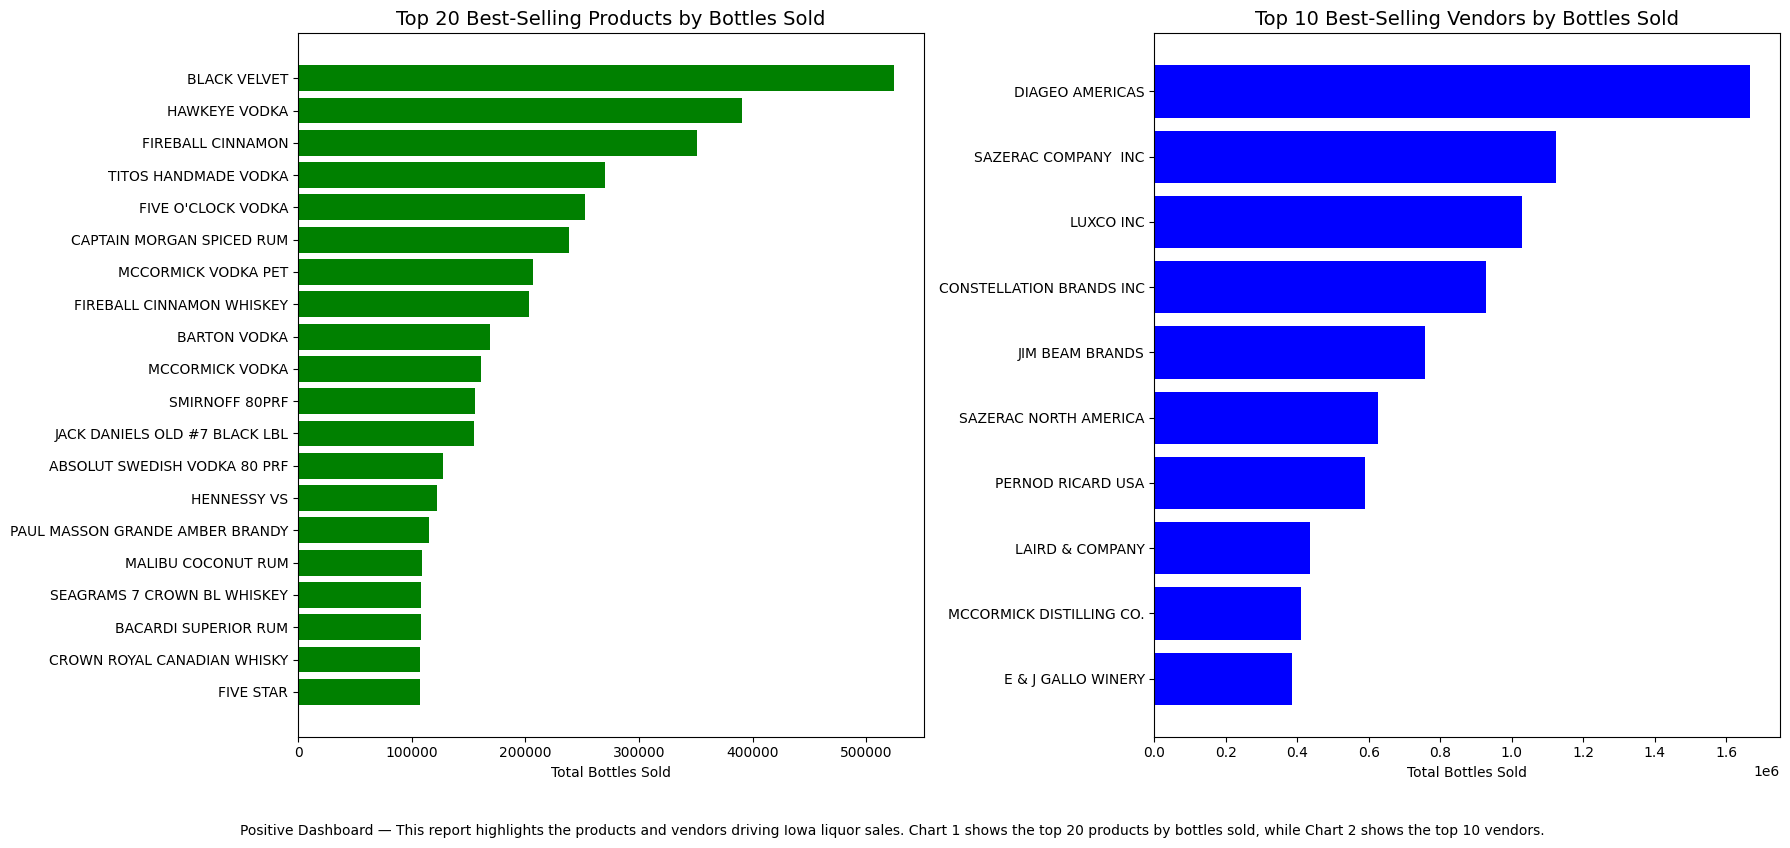

In [11]:
# Create a dashboard with 2 charts
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Chart 1: Top Products
axes[0].barh(top_products.index, top_products['Bottles_Sold'], color='green')
axes[0].set_title('Top 20 Best-Selling Products by Bottles Sold', fontsize=14)
axes[0].set_xlabel('Total Bottles Sold')
axes[0].invert_yaxis()  # highest at top

# Chart 2: Top Vendors
axes[1].barh(top_vendors.index, top_vendors['Bottles_Sold'], color='blue')
axes[1].set_title('Top 10 Best-Selling Vendors by Bottles Sold', fontsize=14)
axes[1].set_xlabel('Total Bottles Sold')
axes[1].invert_yaxis()

# Caption for the whole dashboard
positive_caption_text = (
    "Positive Dashboard — This report highlights the products and vendors driving Iowa liquor sales. "
    "Chart 1 shows the top 20 products by bottles sold, while Chart 2 shows the top 10 vendors. "
)

fig.text(0.5, -0.05, positive_caption_text, wrap=True, ha='center', fontsize=10)

plt.tight_layout()

# Save the figure
plt.savefig("Positive_Dashboard.png", dpi=300, bbox_inches="tight")
plt.show()

## Build the Negative Dashboard Report

In [12]:
# 1. Bottom 20 Products
bottom_products = (
    df_cleaned.groupby('Item_Description', observed=True)
    .agg({'Bottles_Sold': 'sum'})
    .sort_values(by='Bottles_Sold', ascending=True)
    .head(20)
)

# 2. Bottom 10 Vendors
bottom_vendors = (
    df_cleaned.groupby('Vendor_Name', observed=True)
    .agg({'Bottles_Sold': 'sum'})
    .sort_values(by='Bottles_Sold', ascending=True)
    .head(10)
)

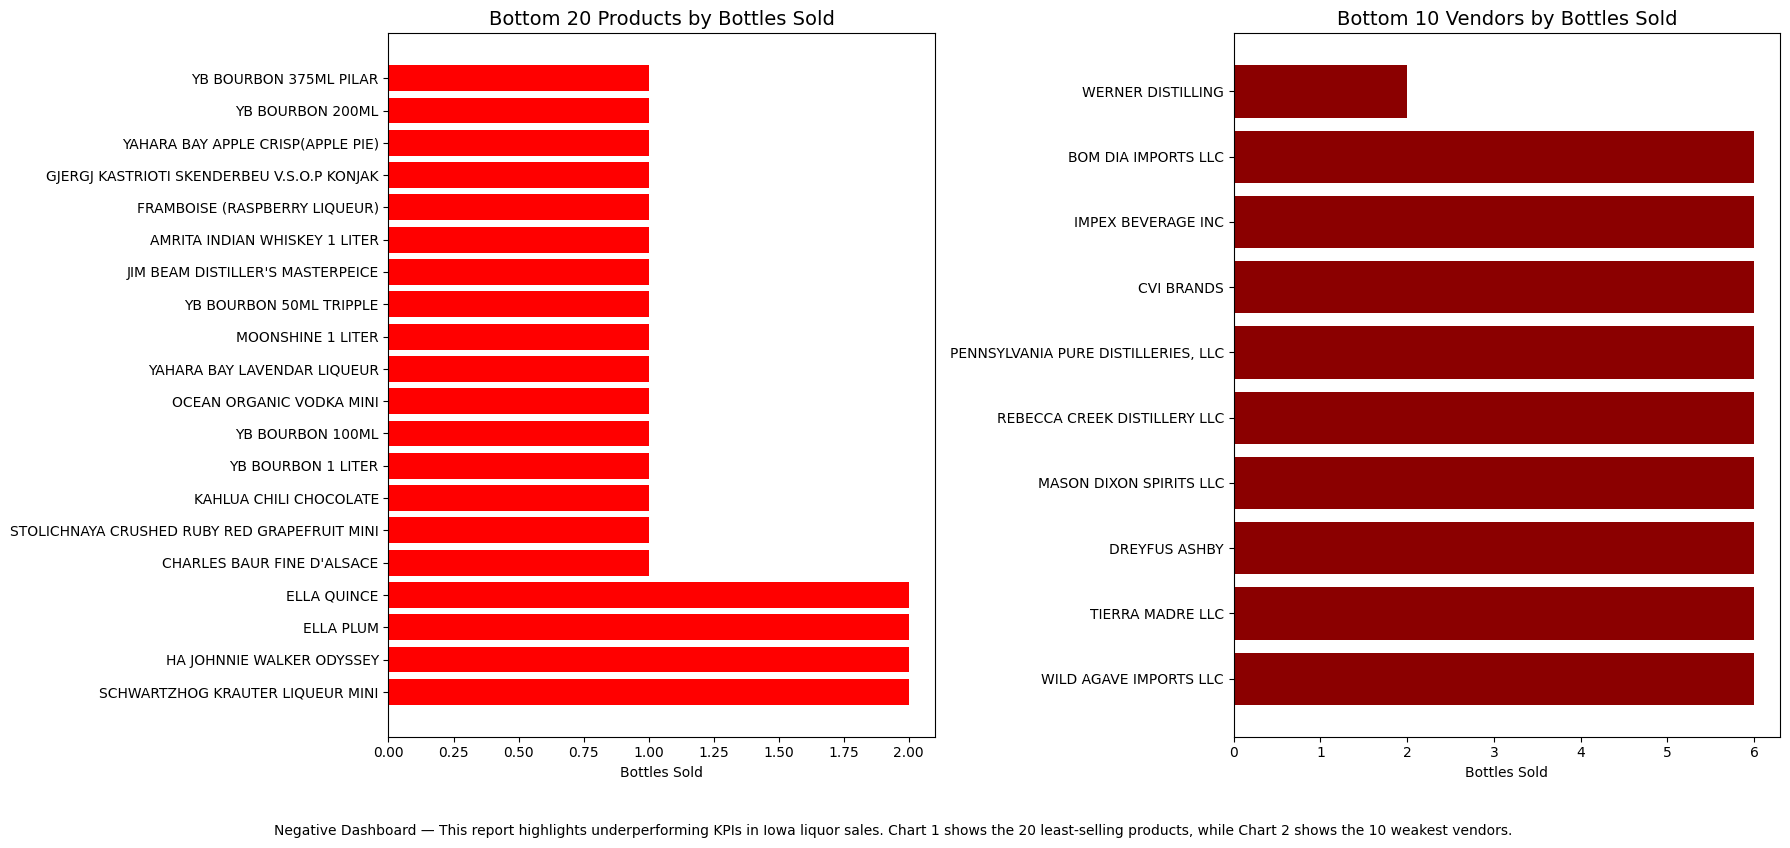

In [13]:
# Create dashboard figure
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Chart 1: Bottom Products
axes[0].barh(bottom_products.index, bottom_products['Bottles_Sold'], color='red')
axes[0].set_title("Bottom 20 Products by Bottles Sold", fontsize=14)
axes[0].set_xlabel("Bottles Sold")
axes[0].invert_yaxis()

# Chart 2: Bottom Vendors
axes[1].barh(bottom_vendors.index, bottom_vendors['Bottles_Sold'], color='darkred')
axes[1].set_title("Bottom 10 Vendors by Bottles Sold", fontsize=14)
axes[1].set_xlabel("Bottles Sold")
axes[1].invert_yaxis()

# Dashboard caption
negative_caption_text = (
    "Negative Dashboard — This report highlights underperforming KPIs in Iowa liquor sales. "
    "Chart 1 shows the 20 least-selling products, while Chart 2 shows the 10 weakest vendors. "
)
fig.text(0.5, -0.05, negative_caption_text, wrap=True, ha='center', fontsize=10)

plt.tight_layout()

# Save the figure
plt.savefig("Negative_Dashboard.png", dpi=300, bbox_inches="tight")
plt.show()